In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()


In [3]:
# The dataset

b = pd.read_csv("day.csv")

In [4]:
# Let's view the dataset

b.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# No. of rows and columns

b.shape

(730, 16)

In [6]:
#Information on the dataset

b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Summary

b.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Let's convert the datatype of dteday column to datetime and Extract the Year and Month from the Date

b['dteday'] =  pd.to_datetime(b['dteday'],format='%d-%m-%Y')
b['dteday'].dtype

dtype('<M8[ns]')

In [9]:
b['year'] = pd.DatetimeIndex(b['dteday']).year
b['month'] = pd.DatetimeIndex(b['dteday']).month

In [10]:
b.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
# Dropping the useless columns


b.drop(['yr','mnth'],axis=1,inplace=True)

In [12]:
b.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [13]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

b.drop('holiday',axis=1,inplace=True)

In [14]:
# Dropping the dteday,instant,casual and registered columns.

b.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)


In [15]:
b.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [16]:
#Creating 4 seasons

codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
b['season'] = b['season'].map(codes)

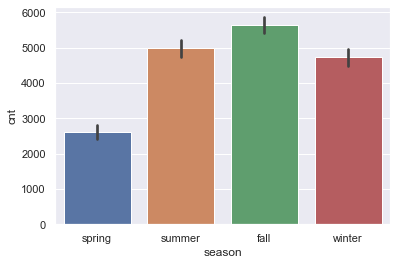

In [17]:
sns.barplot('season','cnt',data=b)

Bike Rentals are more during the Fall(Monsoon) season.




In [18]:
#weathersit

codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
b['weathersit'] = b['weathersit'].map(codes)

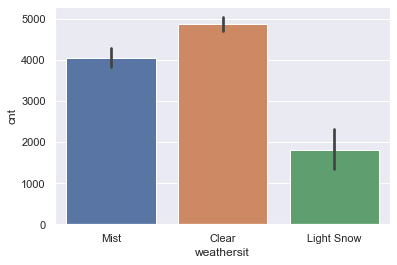

In [19]:
sns.barplot('weathersit','cnt',data=b)

Bikes seem to be rented more in Partly cloudy weather.

In [20]:
#  Workingday - If day is neither weekend nor holiday is 1,otherwise is 0

codes = {1:'working_day',0:'Holiday'}
b['workingday'] = b['workingday'].map(codes)

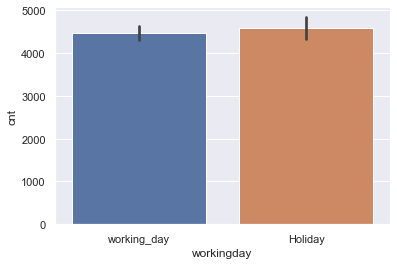

In [21]:
sns.barplot('workingday','cnt',data=b)

Bikes seem to be rented more on working days.

In [22]:
#  Year

codes = {2019:1,2018:0}
b['year'] = b['year'].map(codes)

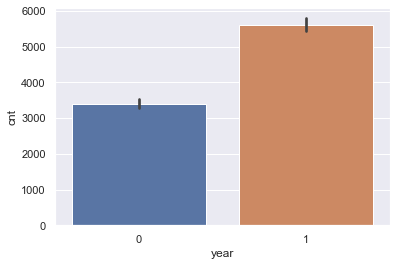

In [23]:
sns.barplot('year','cnt',data=b)

Bike Rental popularity has increased in 2019 when compared to 2018.

In [24]:
# Month

codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
b['month'] = b['month'].map(codes)

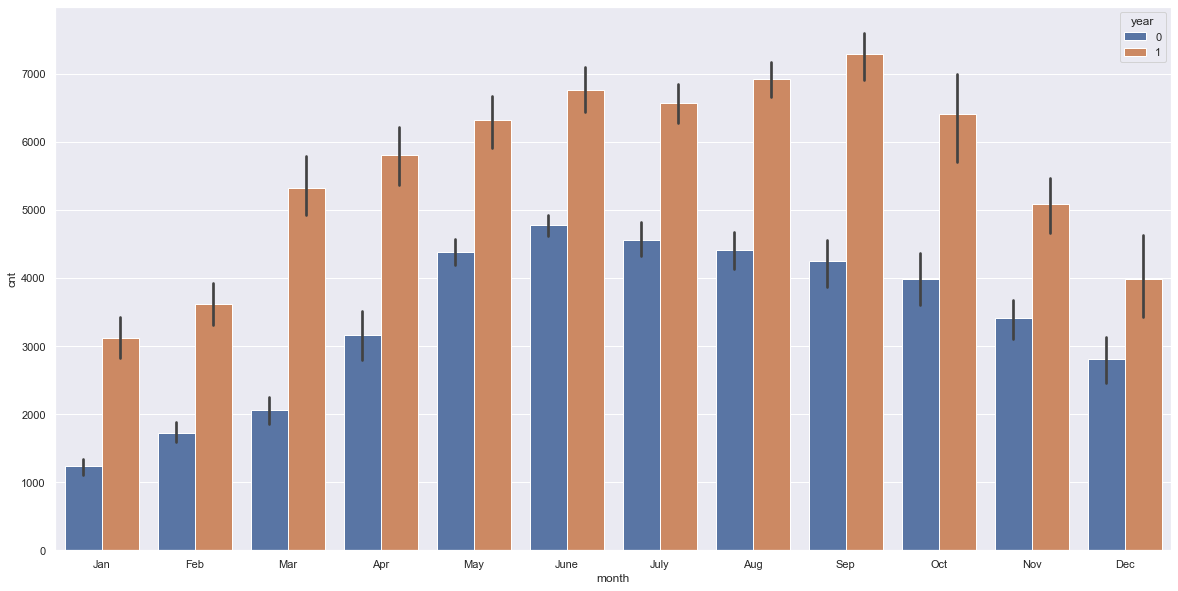

In [25]:
plt.figure(figsize=(20,10))
sns.barplot('month','cnt',hue='year',data=b)

In [26]:
# WeekDay

codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
b['weekday'] = b['weekday'].map(codes)

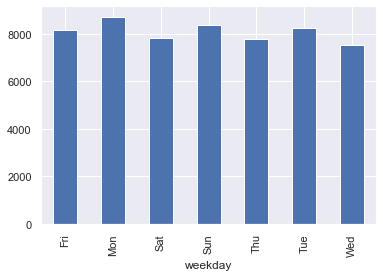

In [27]:
b.groupby('weekday')['cnt'].max().plot(kind='bar')

Bike Rentals are maximum on Sunday and Monday

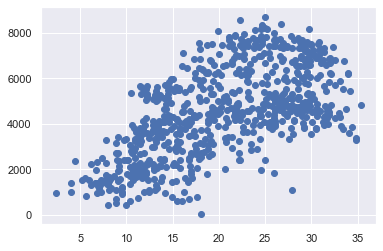

In [28]:
# Temp

plt.scatter('temp','cnt',data=b)

Bike Rentals are observed at higher temperatures.

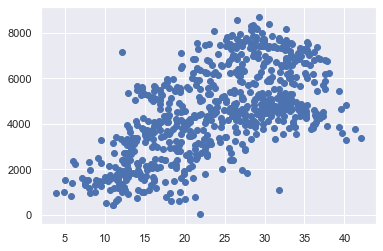

In [29]:
# atemp

plt.scatter('atemp','cnt',data=b)

Bike Rentals are observed at higher "feel-like" temperatures.

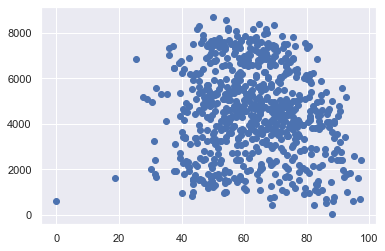

In [30]:
# Humidity

plt.scatter('hum','cnt',data=b)

Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.

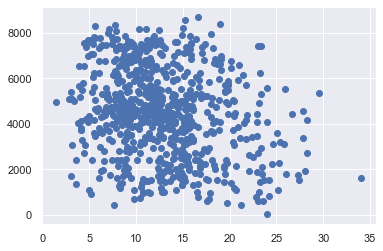

In [31]:
# Windspeed

plt.scatter('windspeed','cnt',data=b)

Wind speeds increase with a greater temperature difference.

                                        Visualizing the Relationship among variables

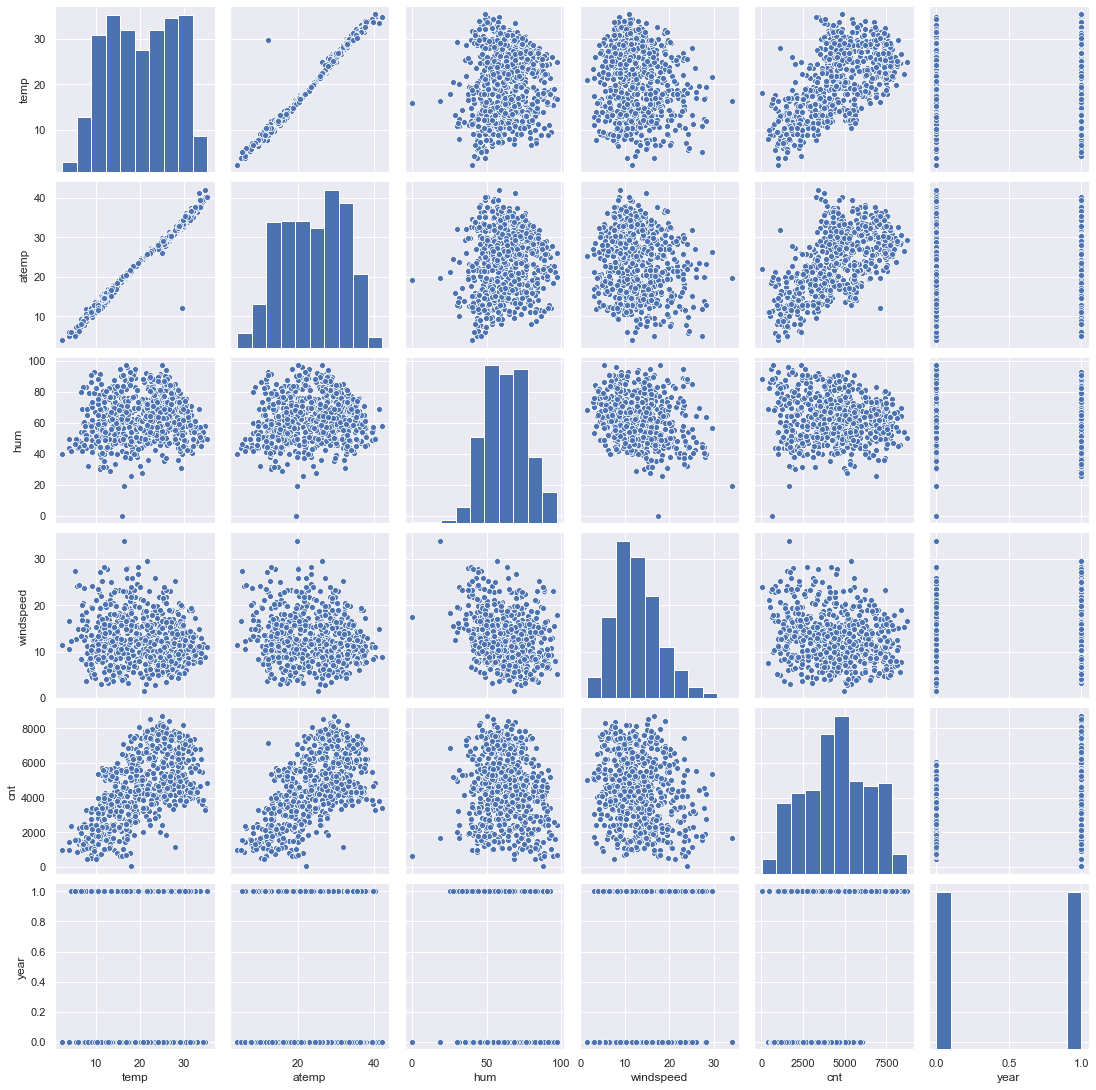

In [32]:
sns.pairplot(b)

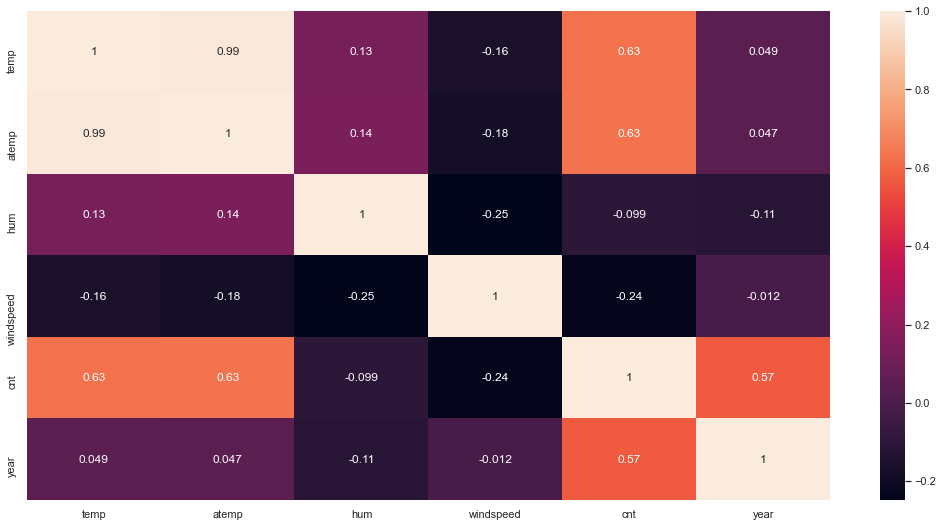

In [33]:
plt.figure(figsize = (18,9))
sns.heatmap(b.corr(),annot=True)

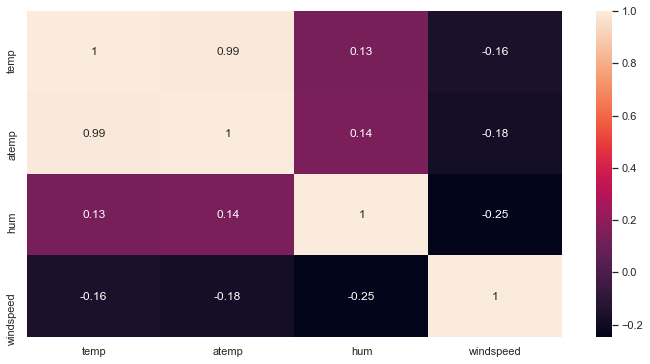

In [34]:
data= b[['temp','atemp','hum','windspeed']]
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot=True)

It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [35]:
b.drop('atemp',axis=1,inplace=True)

                                        Dealing With Categorical Variables

In [36]:
seasons = pd.get_dummies(b['season'],drop_first=True)

working_day = pd.get_dummies(b['workingday'],drop_first=True)

weather= pd.get_dummies(b['weathersit'],drop_first=True)

month= pd.get_dummies(b['month'],drop_first=True)

week_day= pd.get_dummies(b['weekday'],drop_first=True)

In [37]:
b= pd.concat([b,seasons,working_day,weather,month,week_day],axis=1)

In [38]:
b.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [39]:
# Dropping the categorical variables

b.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [40]:
b.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
b.dtypes

temp           float64
hum            float64
windspeed      float64
cnt              int64
year             int64
spring           uint8
summer           uint8
winter           uint8
working_day      uint8
Light Snow       uint8
Mist             uint8
Aug              uint8
Dec              uint8
Feb              uint8
Jan              uint8
July             uint8
June             uint8
Mar              uint8
May              uint8
Nov              uint8
Oct              uint8
Sep              uint8
Mon              uint8
Sat              uint8
Sun              uint8
Thu              uint8
Tue              uint8
Wed              uint8
dtype: object

                                         Splitting the Data into Training and Testing Sets

In [43]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(b, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [46]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

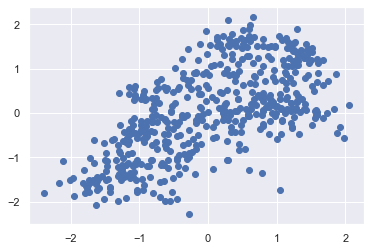

In [48]:
plt.scatter('temp','cnt',data=df_train)

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

                                                  Building a linear model

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [64]:
X_train_rfe = X_train[col]

In [65]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [66]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          3.16e-176
Time:                        11:24:25   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      0.000      -0.856      -0.323
temp            0.4029      0.027     14.765      0.000       0.349       0.457
year            1.0473      0.039     27.009      0.000       0.971       1.123
spring         -0.6760      0.057    -11.825      0.000      -0.788      -0.564
working_day     0.3710      0.134      2.777      0.006       0.109       0.633
Light Snow     -1.2971      0.116    -11.212      0.000      -1.524      -1.070
Mist           -0.3619      0.041     -8.739      0.000      -0.443      -0.281
July           -0.3136      0.082     -3.834      0.000      -0.474      -0.153
Sep             0.2874      0.074      3.884      0.000       0.142       0.433
Mon             0.4613      0.142      3.259      0.001       0.183       0.739
Sun             0.4451      0.142      3.131      0.002       0.166       0.724
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.927
Skew:                          -0.645   Prob(JB):                     1.37e-29
Kurtosis:                       5.143   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_new= X_train_rfe.drop('const',axis=1)

                                                              VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.58
2,spring,2.10
0,temp,2.02
1,year,2.02
5,Mist,1.58
8,Mon,1.39
6,July,1.38
9,Sun,1.33
7,Sep,1.18
4,Light Snow,1.07


All the variables have VIF less than 5 and it's perfect!

In [73]:
# Residual Analysis

y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

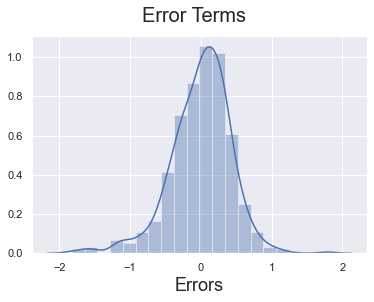

In [74]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

                                                      Making Predictions

In [76]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test_new = X_test[X_train_new.columns]


X_test_new = sm.add_constant(X_test_new)

In [80]:
y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'Predictions')

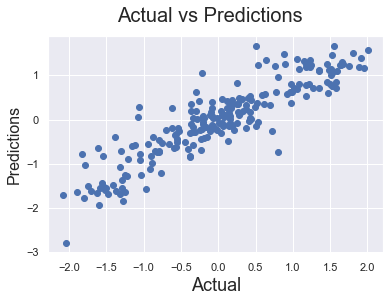

In [81]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predictions', fontsize=16) 

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8051381112407532

                                                            CONCLUSION
-	From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
-   The p-value & VIF value for all variables are also under the limit.
-	Coeffiecients of the variables explains the factors effecting the bike demand
                   y = 0.4029 * temp + 1.0473 * year - 0.6760 * spring + 0.3710 * working_day - 1.2971 * Light Snow - 0.3619 * mist - 0.3136 * July + 0.2874 * Sep + 0.4613 * Mon + 0.4451 * Sun